# Intégration IA app Flask

L'objectif de ce notebook est de proposer un exemple simple d'intégration de micro-services d'intelligence artificielle dans une app web.

## Echauffement : Envoyer une requête à un site

Quelles sont les méthodes de requêtes http que vous connaissez ? 

My answer: get, push, delete

A l'aide de la librairie requests, envoyer une requête au site suivant : https://github.com/timeline.json
<br>
Affichez la réponse

In [1]:
import requests 

In [10]:
r = requests.get('https://github.com/timeline.json')
print (r.text)

{"message":"Hello there, wayfaring stranger. If you’re reading this then you probably didn’t see our blog post a couple of years back announcing that this API would go away: http://git.io/17AROg Fear not, you should be able to get what you need from the shiny new Events API instead.","documentation_url":"https://developer.github.com/v3/activity/events/#list-public-events"}


Quel est le format de la réponse envoyée ? 

In [8]:
print(type(r.text))

<class 'str'>


In [9]:
r = requests.post('https://github.com/timeline.json')
print (r.text)

Cookies must be enabled to use GitHub.


## MSP 2 Choix du sujet

Deux applications business vous sont proposées pour la suite. Vous devez en choisir **UNE** et répondre aux questions suivantes.

#### Application 1 : 
Vous êtes une entreprise qui possède un blog présentant des articles ainsi qu'un espace de commentaires. Afin de prévenir une éventuelle vague de commentaires haineux, et pour se soumettre à la législation qui oblige une modération sur les blogs, vous décidez de faire appel à une API de modération de contenu pour ne pas avoir à employer de modérateurs. En effet, les éditeurs de services qui ne prennent pas des mesures préventives sérieuses s’exposent à des risques d’amende, voire de fermeture du site.

[Application 1](https://ibb.co/gWyBRn4)
<br>
<a href="https://ibb.co/gWyBRn4"><img src="https://i.ibb.co/gWyBRn4/Capture-d-e-cran-de-2020-07-20-09-49-52.png" alt="Capture-d-e-cran-de-2020-07-20-09-49-52" border="0"></a> 

#### Application 2 : 
Vous êtes une entreprise qui possède une grande quantité d'images retraçant des opérations de vente passées (par exemple). Vous avez besoin d'obtenir les informations de texte contenues dans ces fichiers. Vous décidez pour cela d'utiliser une api d'OCR (Reconnaissance Optique de Caractères) afin d'extraire le texte des images.

[Application 2](https://ibb.co/R9JyvZF)
<br>
<a href="https://ibb.co/R9JyvZF"><img src="https://i.ibb.co/R9JyvZF/Capture-d-e-cran-de-2020-07-20-09-50-26.png" alt="Capture-d-e-cran-de-2020-07-20-09-50-26" border="0"></a>

## MSP2 Rédaction

### 1) La problématique business

Reformuler avec plus de détails le besoin business associée au sujet que vous avez choisie. Vous pouvez bien sûr vous éloigner de ce qu'on propose, mais, pour gagner du temps faites en sorte que vous puissiez réutiliser l'un des deux modèles d'app (que vous ayez pas à en refaire from scratch), et que les API d'IA que vous voulez importer existent bien. 

### 2) L'usage de l'IA

Reformuler avec plus de détails en quoi l'IA peut venir résoudre le problème business

### 3) L'état de l'art et des solutions existantes

Parmi les différents services que vous connaissez (OVH Cloud, GCP, Microsoft Azure, AWS, Elastic Cloud, ...), établissez un comparatif des API en termes
de prix et de services proposés permettant de répondre au problème que vous avez choisi ci dessus. 

### 4) L'implémentation avec Azure

Nous choisissons d'utiliser Azure. Azure propose des cognitives services qui regroupent plusieurs API pré-entrainées utilisant de l'intelligence artificielle. Vous pouvez accéder à la [documentation](https://docs.microsoft.com/fr-fr/azure/cognitive-services/) de ces services.
<br> 
Vous pouvez tester certains de ces services en ligne, après avoir créé une ressource pour obtenir la clé permettant d'utiliser les applications. La [documentation](https://docs.microsoft.com/en-us/azure/cognitive-services/cognitive-services-apis-create-account?tabs=multiservice%2Cwindows) explique comment créer ces ressources, et accéder aux clés.

Parmi tous les services disponibles, Azure propose les services permettant de répondre aux deux applications, dans les API de cognitive services : 
- OCR ( [doc](https://docs.microsoft.com/fr-fr/azure/cognitive-services/computer-vision/concept-recognizing-text))
- Content Moderator ( [doc](https://docs.microsoft.com/fr-fr/azure/cognitive-services/content-moderator/overview))

A l'aide de la librairie requests, envoyez une requête vers l'API que vous avez choisie pour votre business case, en vous assurant que la réponse renvoyée corresponde bien à vos attentes

#### Analyze an image stored on disk

In [63]:
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [41]:
%%bash
mkdir -p images

In [67]:
subscription_key = "73ce4df610864335bd26c971426cb6f6"
vision_base_url = "https://uksouth.api.cognitive.microsoft.com/vision/v2.0/"
vision_analyze_url = vision_base_url + "analyze"
ocr_url = vision_base_url + "ocr"
image_path = "images/WMM+LOGO.jpg"

In [70]:
image_data = open(image_path, "rb").read()
headers    = {'Ocp-Apim-Subscription-Key': subscription_key, 
              "Content-Type": "application/octet-stream" }
params     = {'visualFeatures': 'Categories,Description,Color'}
response   = requests.post(ocr_url, 
                           headers=headers, 
                           params=params, 
                           data=image_data)

response.raise_for_status()

analysis      = response.json()
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

[{'boundingBox': '89,185,327,87', 'text': 'WORDS'},
 {'boundingBox': '68,276,352,88', 'text': 'MATTER'},
 {'boundingBox': '165,374,152,49', 'text': 'Media'}]

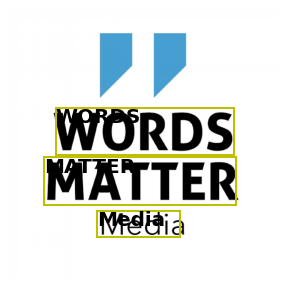

In [71]:
plt.figure(figsize=(5,5))

image = Image.open(image_path)
ax = plt.imshow(image)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch  = Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
_ = plt.axis("off")

#### Text recognition with Computer Vision API

In [74]:
subscription_key = "73ce4df610864335bd26c971426cb6f6"
vision_base_url = "https://uksouth.api.cognitive.microsoft.com/vision/v2.0/"
text_recognition_url = vision_base_url + "recognizeText"
print(text_recognition_url)

https://uksouth.api.cognitive.microsoft.com/vision/v2.0/recognizeText


In [100]:
# image_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"
image_url = "https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/126259992/original/d377377b6758a398b9ab6cbe1d27fd536acfcca8/convert-any-handwritten-english-or-hindi-text-to-word-or-excel.jpg"

In [101]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'mode' : 'Handwritten'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [102]:
operation_url = response.headers["Operation-Location"]

In [103]:
import time

analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(operation_url, headers=headers)
    analysis       = response_final.json()
    time.sleep(1)

In [104]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

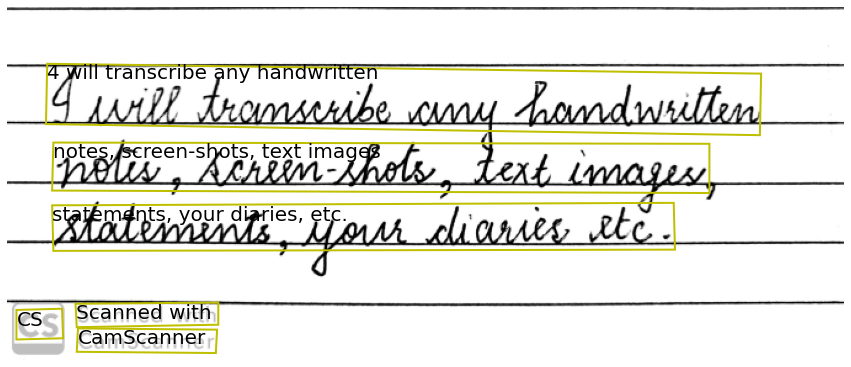

In [105]:
from matplotlib.patches import Polygon

plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True,fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

### 5) Intégration dans l'App

Le code du site web pour chacun des business case est disponible dans le fichier zip qui vous à été transmis. 
<br>
Intégrez votre appel d'API dans l'application pour pouvoir répondre au business case que vous avec choisi.

Montrez l'impact des modifications que vous avez apportées sur l'application. Vous pouvez inclure des screenshots de l'application modifiée.

Dans votre rédaction de MSP2, pensez à inclure des briques de code pour montrer le travail réalisé (notamment le script qui appelle l'API).

## Bonus

- Déployer l'app sur Azure en ayant recours à un Docker
- Introduire une base de données persistante à l'app